<a href="https://colab.research.google.com/github/Eunmaaa/studies/blob/main/%EC%82%AC%EB%9E%8C%EC%96%BC%EA%B5%B4_ai%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/aipython/"

!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip -q celeba-dataset.zip -d .

In [ ]:
#Discriminator

import tensorflow as tf

# 이미지가 진짜인지 가짜인지 판정해줌
# 인풋 : 이미지, 아웃풋 : 판정결과 (1개)
discriminator = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=[64,64,1]),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(64, (3,3), strides=(2, 2), padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Dropout, Flatten, Conv2D, Conv2DTranspose, BatchNormalization

generator = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4 * 4 * 256, input_shape=(100,) ),
  tf.keras.layers.Reshape((4, 4, 256)),
  tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same'),
  tf.keras.layers.LeakyReLU(alpha=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding='same', activation='sigmoid')
])

generator.summary()

In [6]:
GAN = tf.keras.models.Sequential([ generator, discriminator ])

discriminator.compile( optimizer = 'adam' , loss='binary_crossentropy' )

discriminator.trainable = False

GAN.compile( optimizer = 'adam' , loss='binary_crossentropy' )


(10, 100)
1/1 [==============================] - 0s 75ms/step
(10, 64, 64, 1)


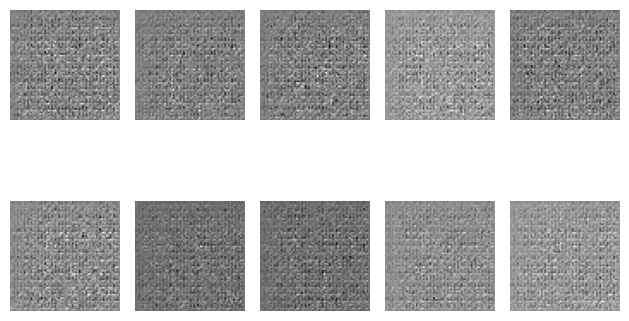

In [10]:
import numpy as np

def predict_pic():
  # 랜덤 숫자는 uniform, normal 추천
  랜덤숫자 = np.random.uniform(-1, 1, size =(10, 100)) # uniform ->  100개 숫자를 8개
  랜덤숫자2 = np.random.normal(3, 2, size=(2, 4)) # normal -> 정규분포스럽게 뽑아줌. 3을 평균 표준편차 2로 하는 랜덤값 뽑기

  print(랜덤숫자.shape)

  예측 = generator.predict( 랜덤숫자 )
  print(예측.shape)  # 결과값 : 64 * 64 *1 이미지가 8개

  import matplotlib.pyplot as plt

  for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(예측[i].reshape(64,64), cmap= 'gray')  # 컬러면 64,64,3
    plt.axis('off')
  plt.tight_layout()
  plt.show()


In [ ]:
X데이터 = images

for j in range(300):
  # epoch 1회
  print(f'epoch : {j}')
  predict_pic()

  for i in range(50000//128):

    # batch 128

    if i % 100 == 0:
      print(f'몇번째 batch : {i}')

    #discriminator 트레이닝
    진짜사진 = X데이터[i*128 : (i+1)*128]
    정답 = np.ones(shape=(128, 1))
    # discriminator.train_on_batch( 진짜사진 128장, 1로 마킹한 정답들 ) ->정답만 트레이닝
    loss1 = discriminator.train_on_batch(진짜사진, 정답)

    랜덤숫자 = np.random.uniform(-1, 1, size =(128, 100))
    가짜사진 = generator.predict(랜덤숫자)
    오답 = np.zeros(shape=(128, 1))
    # discriminator.train_on_batch( 가짜사진 128장, 0로 마킹한 정답들 ) ->오답만 트레이닝
    loss2 = discriminator.train_on_batch(가짜사진, 오답)

    # generator 트레이닝
    랜덤숫자 = np.random.uniform(-1, 1, size =(128, 100))
    정답 = np.ones(shape=(128, 1))
    loss3 = GAN.train_on_batch(랜덤숫자, 정답)
  print(f'이번 epoch 총 loss = Discriminator loss값 : {loss1+loss2} GAN loss값 : {loss3}')
